In [34]:
#imports
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import math

from PathFinder import find_path

In [74]:
#read data
PATH = "E:/School/elen239a/final/input/"

#select files
#files = ['application_train.csv','application_test.csv',]
files = ['preprocessed_train.csv', 'preprocessed_test.csv','application_train.csv']
"""         
          'bureau.csv', 
         'bureau_balance.csv', 'credit_card_balance.csv',
         'installments_payments.csv', 'POS_CASH_balance.csv',
         'previous_application.csv']
"""
data_files=[]
data=[]
print("files used: {}".format(files))

#actually read files
for file in files:
    stuff = pd.read_csv(PATH+file,header=0,engine='python')
    #print(stuff)
    data_files.append(file)
    data.append(stuff)

files used: ['preprocessed_train.csv', 'preprocessed_test.csv', 'application_train.csv']


In [36]:
#select and convert columns
original_train = data[0] #save the original because we'll need some stuff later
original_test = data[1]
app_train = data[0].copy()
app_test = data[1].copy()

#delete ID cols
del app_train['SK_ID_CURR']
del app_test['SK_ID_CURR']

app_train_y = app_train['TARGET']
new_cols_x = app_train.columns.values.tolist()
new_cols_x.remove('TARGET')
app_train_x = app_train[new_cols_x]

print('Training Features shape: ', app_train_x.shape) #235 cols
print('Testing Features shape: ', app_test.shape) #235 cols

Training Features shape:  (307511, 235)
Testing Features shape:  (48744, 235)


In [37]:
#apply logistic regression
from sklearn.linear_model import LogisticRegression

# Make the model with the specified regularization parameter
log_reg = LogisticRegression(C = 2.783, penalty='l2', random_state=20)

# Train on the training data
log_reg.fit(app_train_x, app_train_y)


LogisticRegression(C=2.783, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=20, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [38]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(app_train_x,app_train_y)

lin_reg_pred = lin_reg.predict(app_test).clip(0,1)
lin_reg_pred

array([0.07000732, 0.21350098, 0.07263184, ..., 0.07727051, 0.07080078,
       0.14685059])

In [39]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(random_state=5)

forest.fit(app_train_x,app_train_y)

forest_pred = forest.predict(app_test).clip(0,1)
forest_pred

array([0. , 0.1, 0.1, ..., 0.1, 0. , 0. ])

In [40]:
thecols=app_train.columns.values.tolist()
abc = np.hstack((log_reg.intercept_[:,None], log_reg.coef_)).tolist()
coefs=abc[0]
type(coefs)
len(coefs)
print(coefs[:])

type(thecols)
len(thecols)
print(thecols[:-1])


[-1.1297045104103416, 0.17432706837353606, 0.5771498673313061, 8.296323767342326, 2.199406781455779, -10.085245219330048, 0.07217078168783315, -0.00024380530612934208, 10.838829282441004, 0.2535706993857111, 0.3396026669491175, 0.04285512666676155, -0.9158390127455251, 1.5165706292608971, 0.1777577580398315, -0.21570126239050405, -0.07342435634484451, -0.08368583956638358, 0.14003132044090894, -0.18360000616404096, 0.46358063953869516, -0.07279972989615163, -0.2063852632776166, 0.085457708877755, -0.1396205706781964, 0.20309354391950757, -0.07630118206613731, 0.06337734752423825, -1.0953275082747977, -1.755396237930156, -2.374271394035876, 0.09476411398900701, -1.1990581536256801, 0.2367281025740318, 1.1150113414120644, 0.18621310833508464, -0.21471968876889488, 0.4132009515718712, 0.046775213308800995, -0.002349654170566824, 0.8317451396028267, -0.22135674587207566, 0.21494371935618095, -0.45200532536036886, 1.0326476360468886, 0.018617068857135953, 0.415279978866457, 0.07261253410178

In [67]:
total = 0
s_cols=[]
sm_cols=[]
a_coefs=[]

s_coefs = sorted(coefs) #sorted coefs


for x in coefs:
    a_coefs.append(math.fabs(x)) #abs coefs

sabs = sorted(a_coefs) #sorted and abs coefs

#print(s_coefs)
#print(sabs)
for x in s_coefs:
    s_cols.append(thecols[coefs.index(x)])
    
for x in sabs:
    sm_cols.append(thecols[a_coefs.index(x)])
    
print("top 10 most important impactful columns are:")
i = len(sm_cols)
print(sm_cols[(i-10):])
print("with weights:")
print(sabs[(i-10):])

print("10 least important:")
print(sm_cols[:10])
print("with weights:")
print(sabs[:10])


for x in coefs:
    total += x

strictlypos = 0
for y in a_coefs:
    strictlypos += y
    
    
avg = total/len(coefs)
posavg = strictlypos/len(coefs)

print(avg)
print(posavg)

dev = 0
for z in coefs:
    dev += (y - avg)**2

std = math.sqrt(dev/len(coefs))
adev =0
for zz in a_coefs:
    adev += (zz - posavg)**2

adevstd = math.sqrt(adev/len(coefs))

print(std)
print(adevstd)




top 10 most important impactful columns are:
['AMT_GOODS_PRICE', 'FLAG_DOCUMENT_3', 'APARTMENTS_AVG', 'OBS_60_CNT_SOCIAL_CIRCLE', 'NAME_INCOME_TYPE_State servant', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'FONDKAPREMONT_MODE_not specified', 'AMT_ANNUITY', 'REGION_POPULATION_RELATIVE', 'DAYS_REGISTRATION']
with weights:
[2.199406781455779, 2.3657309878161565, 2.374271394035876, 3.560522117815234, 3.8350905120323038, 4.387746123353218, 4.830806707255761, 8.296323767342326, 10.085245219330048, 10.838829282441004]
10 least important:
['DAYS_EMPLOYED', 'LANDAREA_AVG', 'EMERGENCYSTATE_MODE_No', 'ORGANIZATION_TYPE_Industry: type 7', 'FONDKAPREMONT_MODE_org spec account', 'CODE_GENDER_F', 'ORGANIZATION_TYPE_Restaurant', 'WALLSMATERIAL_MODE_Block', 'BASEMENTAREA_MEDI', 'ORGANIZATION_TYPE_Transport: type 3']
with weights:
[0.00024380530612934208, 0.002349654170566824, 0.005948071808270981, 0.005958515633952466, 0.008133195913873752, 0.011112408986123121, 0.012211890099259964, 0.015045866755991566, 0.016203

In [76]:
O_cols=data[2].columns.values.tolist()
print(O_cols)

['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELE

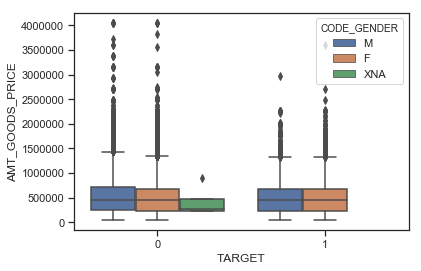

In [87]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks", color_codes=True)

#sns.lmplot( 'AMT_INCOME_TOTAL','CNT_CHILDREN', data=app_train, fit_reg=False)



sns.boxplot(x="TARGET", y="AMT_GOODS_PRICE",
            hue="CODE_GENDER",
            data=data[2])



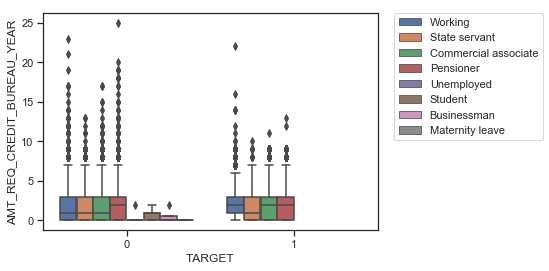

In [90]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks", color_codes=True)

#sns.lmplot( 'AMT_INCOME_TOTAL','CNT_CHILDREN', data=app_train, fit_reg=False)



sns.boxplot(x="TARGET", y="AMT_REQ_CREDIT_BUREAU_YEAR",
            hue="NAME_INCOME_TYPE",
            data=data[2])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [ ]:
"""
from sklearn.model_selection import GridSearchCV
# Create regularization penalty space
penalty = ['l1', 'l2']
C = np.logspace(0, 4, 10)
hyperparameters = dict(C=C, penalty=penalty)
clf = GridSearchCV(logistic, hyperparameters, cv=5, verbose=0)
#"""

In [8]:
# Make predictions
# Make sure to select the second column only
log_reg_pred = log_reg.predict_proba(app_test)[:, 1]

In [23]:
# Submission dataframe
submit = original_test[['SK_ID_CURR']]
submit['TARGET'] = forest_pred

submit.head()

C:\Users\jon.harris\AppData\Local\Continuum\anaconda3\Lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,SK_ID_CURR,TARGET
0,100001,0.0
1,100005,0.1
2,100013,0.1
3,100028,0.0
4,100038,0.1


In [24]:
# Save the submission to a csv file
overwrite = False
if overwrite:
    submit.to_csv('results/forest_reg.csv', index = False)

Submitted to kaggle
score: 0.67825

In [11]:
print(log_reg.coef_.shape)

(1, 235)


In [1]:
"""
print('intercept:', log_reg.intercept_[:,None][0][0])
print('weights:',log_reg.coef_[0])
np.hstack((log_reg.intercept_[:,None], log_reg.coef_))
print('weights:')
for feature, weight in zip(new_cols_x, log_reg.coef_[0]):
    #print('{:3.7} {}'.format(weight, feature))
    print(f'{weight} {feature}')
    """

NameError: name 'log_reg' is not defined